In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #그래프

import pylab as pl
import numpy as np
%matplotlib inline
sns.set(style="darkgrid", palette="bright", font_scale=1.5)
import plotly.graph_objs as go
import plotly.offline as py
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
py.init_notebook_mode()

In [82]:
df = pd.read_csv("import_US.csv", encoding=('cp949'))
df

YEAR/MONTH    AMOUNT  PERCENTAGE_OF_AMOUNT    CASES  PERCENTAGE_OF_CASES  \
0      2010-01   9660378                  0.36   135375                53.87   
1      2010-02   9659031                  0.34   136655                54.13   
2      2010-03  14662770                  0.39   221553                62.03   
3      2010-04  15980152                  0.43   241411                64.68   
4      2010-05  15752053                  0.45   238507                64.70   
..         ...       ...                   ...      ...                  ...   
121    2020-02  81889944                  1.51  1760663                91.90   
122    2020-03  88105092                  1.64  1830007                91.24   
123    2020-04  70639218                  1.40  1497774                91.11   
124    2020-05  70770041                  1.65  1474033                91.23   
125    2020-06  69328605                  1.51  1403924                90.00   

     TOTAL_AMOUNT  TOTAL_CASES  
0      2714163225       251283  
1      2871249956       252437  
2      3724315007       357149  
3      3691618881       373244  
4      3499066314       368612  
..            ...          ...  
121    5435389579      1915813  
122    5388656099      2005601  
123    5038903721      1643898  
124    4287271374      1615724  
125    4588196305      1559943  

[126 rows x 7 columns]

In [83]:
cdf = df[['AMOUNT', 'PERCENTAGE_OF_AMOUNT','CASES','TOTAL_AMOUNT','TOTAL_CASES']]
cdf.head(15)

AMOUNT  PERCENTAGE_OF_AMOUNT   CASES  TOTAL_AMOUNT  TOTAL_CASES
0    9660378                  0.36  135375    2714163225       251283
1    9659031                  0.34  136655    2871249956       252437
2   14662770                  0.39  221553    3724315007       357149
3   15980152                  0.43  241411    3691618881       373244
4   15752053                  0.45  238507    3499066314       368612
5   13034425                  0.35  215571    3687235743       342150
6   14291763                  0.41  237771    3506440597       366045
7   12924275                  0.39  207548    3274562930       335618
8   14911409                  0.45  234728    3316215810       354377
9   17868237                  0.56  273007    3197839444       403473
10  16069472                  0.48  238660    3353670989       368062
11  20030386                  0.56  297693    3566312355       439505
12  18817641                  0.60  302498    3118614964       433009
13  17973370                  0.61  311539    2967042304       424559
14  22987461                  0.59  389029    3910511886       528707

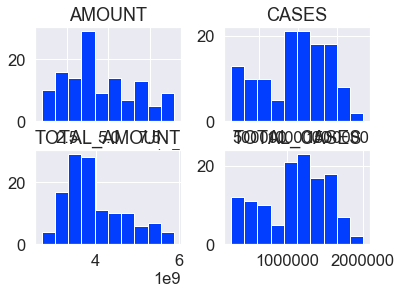

In [84]:
viz = cdf[['AMOUNT','CASES','TOTAL_AMOUNT','TOTAL_CASES']]
viz.hist()
plt.show()

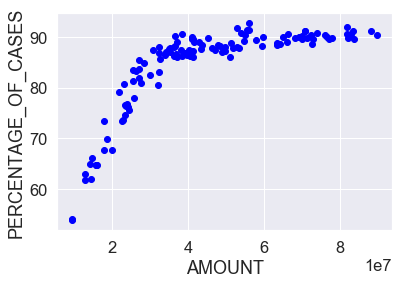

In [85]:
plt.scatter(cdf.AMOUNT,df.PERCENTAGE_OF_CASES,  color='blue')
plt.xlabel("AMOUNT")
plt.ylabel("PERCENTAGE_OF_CASES")
plt.show()

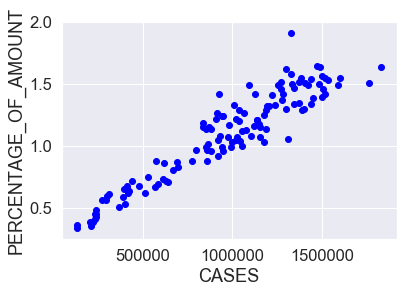

In [86]:
plt.scatter(df.CASES, df.PERCENTAGE_OF_AMOUNT,  color='blue')
plt.xlabel("CASES")
plt.ylabel("PERCENTAGE_OF_AMOUNT")
plt.show()

In [87]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [88]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CASES']])
train_y = np.asanyarray(train[['PERCENTAGE_OF_AMOUNT']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[8.27637408e-07]]
Intercept:  [0.29094734]


Text(0, 0.5, 'PERCENTAGE_OF_AMOUNT')

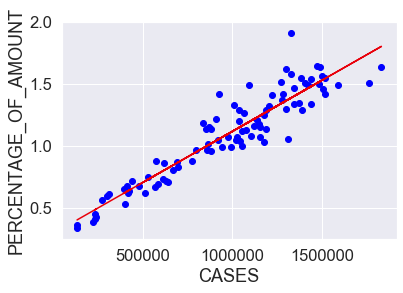

In [89]:
plt.scatter(train.CASES, train.PERCENTAGE_OF_AMOUNT,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("CASES")
plt.ylabel("PERCENTAGE_OF_AMOUNT")

In [90]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['CASES']])
test_y = np.asanyarray(test[['PERCENTAGE_OF_AMOUNT']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.09
Residual sum of squares (MSE): 0.01
R2-score: 0.90


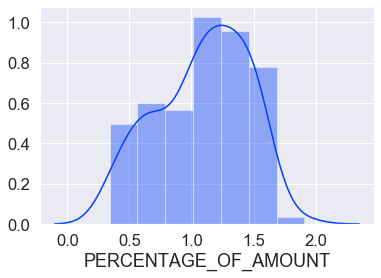

In [91]:
sns.distplot(df['PERCENTAGE_OF_AMOUNT'])

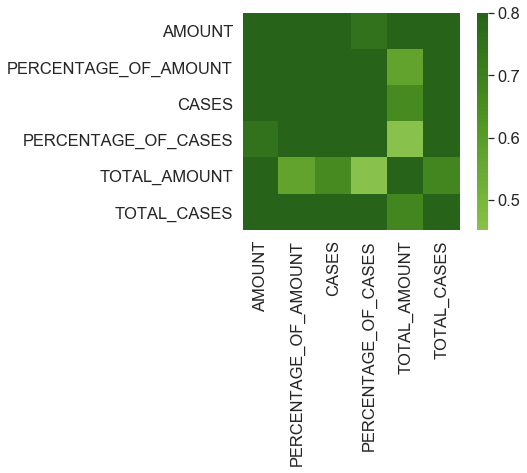

In [92]:
corrmat = df.corr()
sns.color_palette("Paired")
sns.heatmap(corrmat, vmax=.8, square=True, cmap="PiYG", center=0)

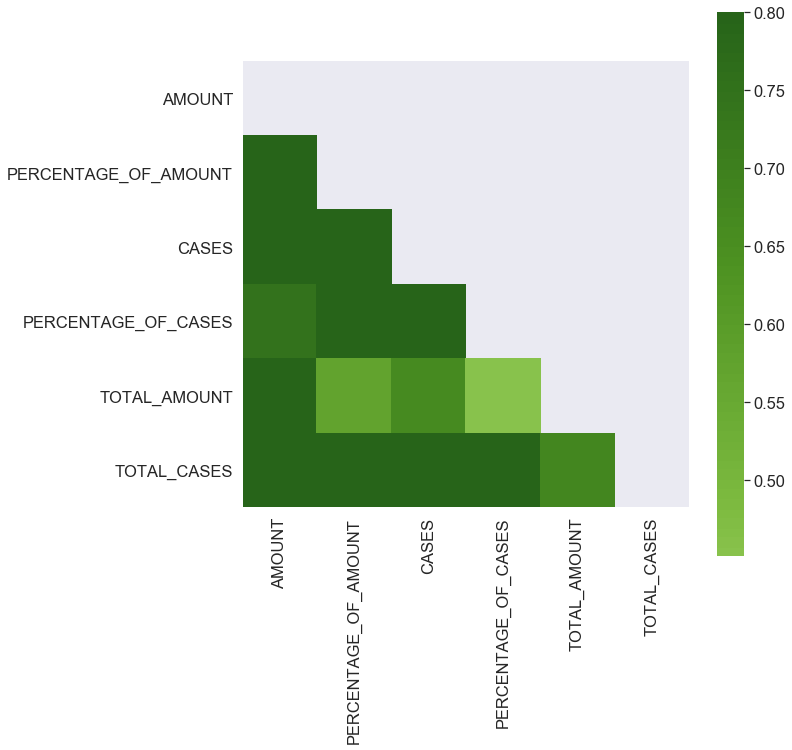

In [93]:
corrmat = df.corr()
mask= np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #np.triu_indice()는 행렬의 상단 삼각형을 반환시킴
plt.figure(figsize= (10,10))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="PiYG", center=0, mask = mask)

In [100]:
kcj_df = df[df['YEAR/MONTH'].str.contains('06')]
kcj_df

YEAR/MONTH    AMOUNT  PERCENTAGE_OF_AMOUNT    CASES  PERCENTAGE_OF_CASES  \
5      2010-06  13034425                  0.35   215571                63.00   
17     2011-06  24293924                  0.62   420067                76.20   
29     2012-06  23224079                  0.62   512688                80.66   
41     2013-06  28414070                  0.87   692193                84.93   
53     2014-06  43823447                  1.20  1038028                88.42   
65     2015-06  40786329                  1.07  1025503                87.20   
77     2016-06  37248251                  0.97   858618                85.97   
89     2017-06  51934784                  1.08  1103352                87.76   
101    2018-06  63424849                  1.32  1192352                88.73   
113    2019-06  69917920                  1.50  1330166                90.20   
125    2020-06  69328605                  1.51  1403924                90.00   

     TOTAL_AMOUNT  TOTAL_CASES  
5      3687235743       342150  
17     3917066450       551293  
29     3764716314       635625  
41     3265591898       814998  
53     3650298333      1173993  
65     3824376376      1176077  
77     3834102127       998699  
89     4806053868      1257281  
101    4788171096      1343862  
113    4671519057      1474696  
125    4588196305      1559943

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


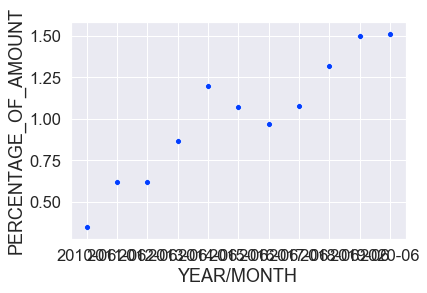

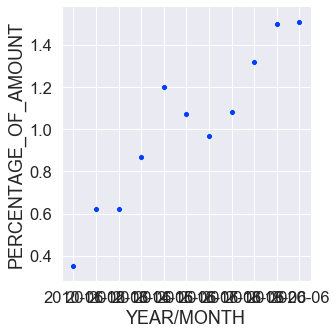

In [101]:
sns.scatterplot(x= 'YEAR/MONTH', y= 'PERCENTAGE_OF_AMOUNT', data= kcj_df)
sns.relplot(x="YEAR/MONTH", y="PERCENTAGE_OF_AMOUNT",sizes=(400, 400), data= kcj_df)

# Predicting future amounts of import from US to Korea
## Using fbProphet to use regression form. 
### If we use LSTM, the amount value just come out with keep increasing.

In [96]:
fig1 = go.Figure()

fig1.add_trace(
    go.Scatter(
        x= df['YEAR/MONTH'],
        y=df.AMOUNT,
        name='IMPORT AMOUNT Progression', fillcolor = 'black'
        
    
    )
)

In [111]:
df_pre = df.rename(columns={
    'YEAR/MONTH': 'ds',
    'AMOUNT': 'y'
})

df_pro = df_pre[['ds', 'y']]
df_pro

ds         y
0    2010-01   9660378
1    2010-02   9659031
2    2010-03  14662770
3    2010-04  15980152
4    2010-05  15752053
..       ...       ...
121  2020-02  81889944
122  2020-03  88105092
123  2020-04  70639218
124  2020-05  70770041
125  2020-06  69328605

[126 rows x 2 columns]

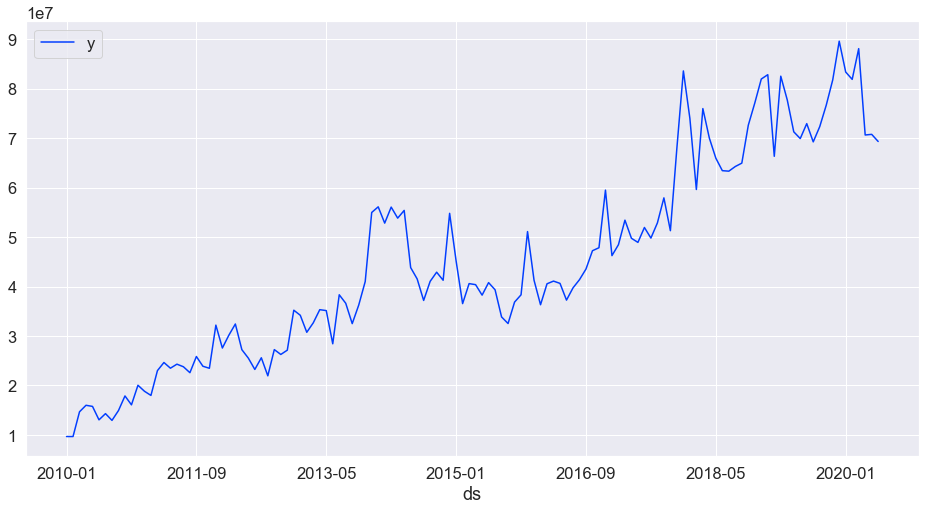

In [104]:
#df_pro.plot(x='ds', y='y', figsize=(16, 8))

#m = Prophet(changepoint_prior_scale=0.01).fit(df)
#future = m.make_future_dataframe(periods=300, freq='H')
#fcst = m.predict(future)
#fig = m.plot(fcst)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


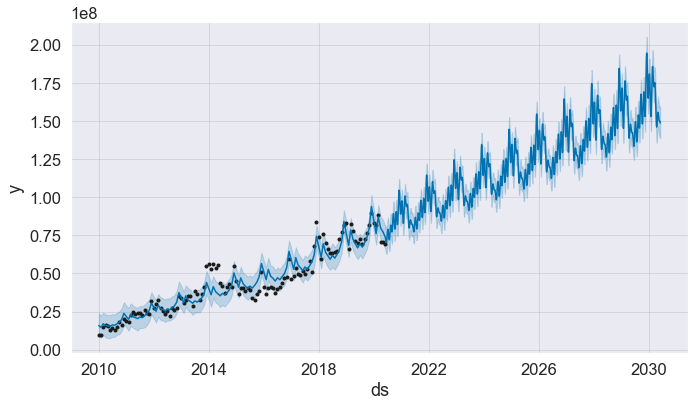

In [114]:
m = Prophet(seasonality_mode='multiplicative').fit(df_pro)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
fig = m.plot(fcst)

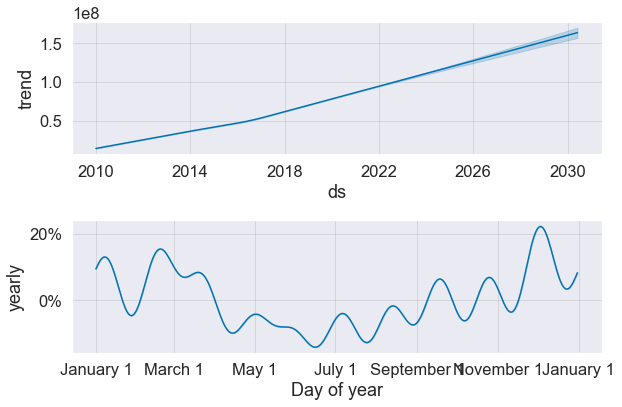

In [118]:
fig1 = plot_plotly(m, fcst)
py.iplot(fig1)
fig2 = m.plot_components(fcst)


In [122]:
future1 = m.make_future_dataframe(periods=120, freq='M')
fcst1 = m.predict(future1)
fig3 = plot_plotly(m, fcst1)
py.iplot(fig3)
